# Homework 6

## 3 Chapter 10 

In this problem, you will perform K-means clustering manually, with
K = 2, on a small example with n = 6 observations and p = 2
features. The observations are as follows.

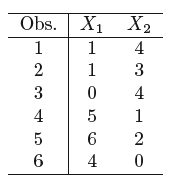

(a) Plot the observations.

(b) Randomly assign a cluster label to each observation. You can
use the sample() command in R to do this. Report the cluster
labels for each observation.

(c) Compute the centroid for each cluster.

(d) Assign each observation to the centroid to which it is closest, in
terms of Euclidean distance. Report the cluster labels for each
observation.

(e) Repeat (c) and (d) until the answers obtained stop changing.

(f) In your plot from (a), color the observations according to the
cluster labels obtained.

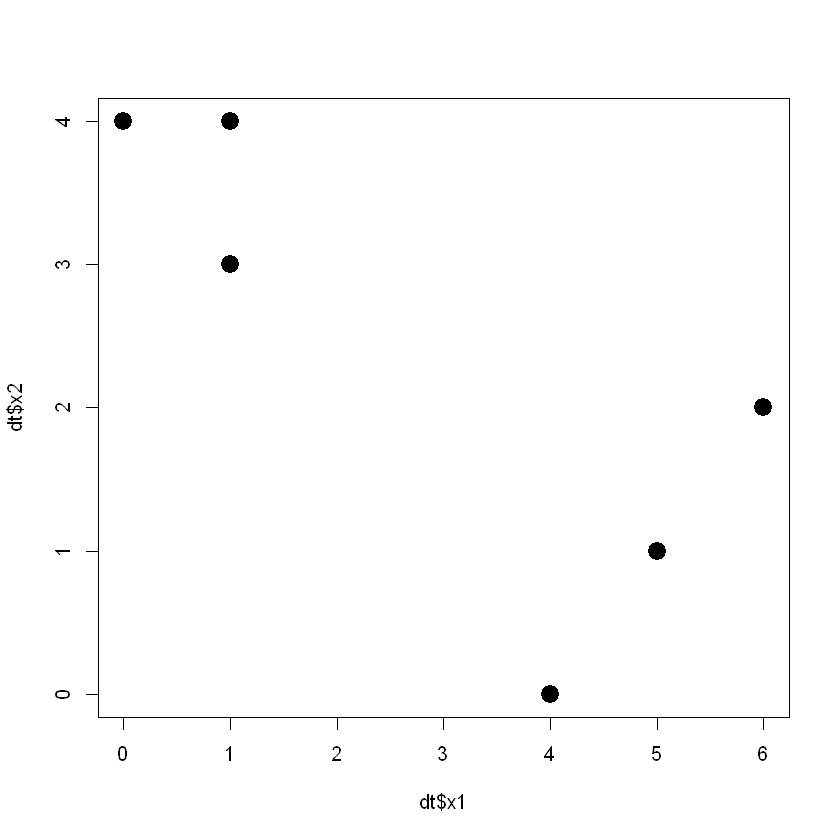

In [16]:
#a)
dt <- data.frame(x1=c(1,1,0,5,6,4),x2=c(4,3,4,1,2,0))
plot(dt$x1,dt$x2, pch=20, cex=3)

In [11]:
#b)
set.seed(42)
clusters <- sample(2, nrow(dt), replace=T)
clusters

[1] 1 1 1 1 2 2

In [13]:
#c)
centroid1 <- c(mean(dt[clusters==1, 1]), mean(dt[clusters==1, 2]))
centroid2 <- c(mean(dt[clusters==2, 1]), mean(dt[clusters==2, 2]))
centroid1
centroid2

[1] 1.75 3.00

[1] 5 1

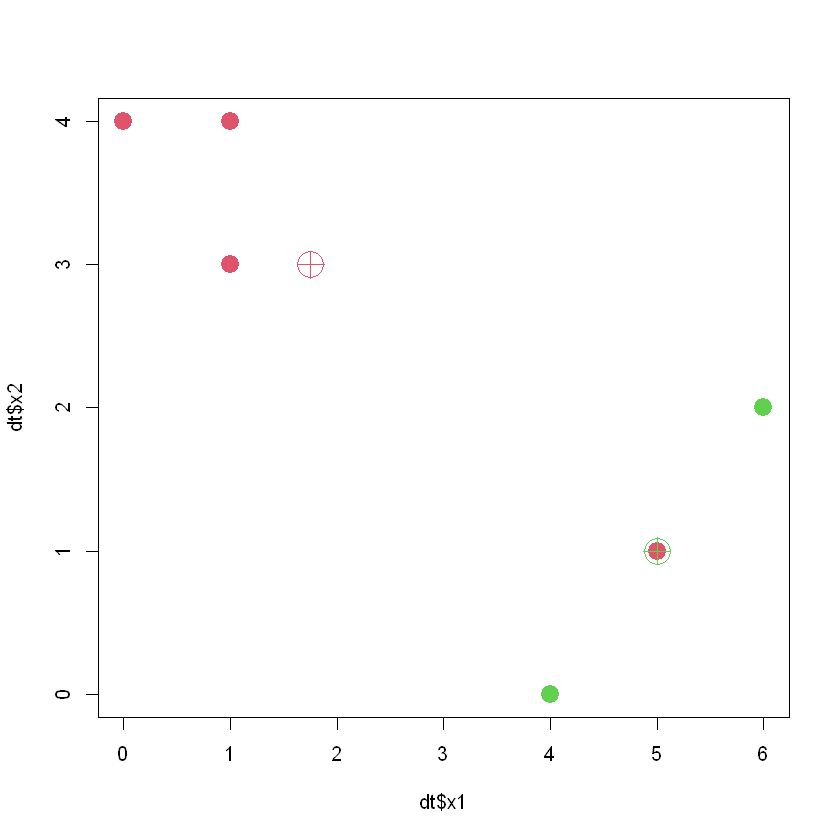

In [23]:
plot(dt$x1, dt$x2, col=(clusters+1), pch=20,cex=3)
points(centroid1[1], centroid1[2], col=2, pch=10,cex=3)
points(centroid2[1], centroid2[2], col=3, pch=10,cex=3)

In [36]:
#d)
euclid <- function(a, b) {
  sqrt((a[1] - b[1])^2 + (a[2]-b[2])^2)
}
labels = rep(NA, nrow(dt))
for (i in 1:nrow(dt)) {
    if (euclid(dt[i,], centroid1) < euclid(dt[i,], centroid2)) {
      labels[i] = 1
    } else {
      labels[i] = 2
    }
}

labels

[1] 1 1 1 2 2 2

In [58]:
#e)

last_labels <- rep(0, 6)
while (!all(last_labels == labels)) {
    
    last_labels <- labels
    centroid1 <- c(mean(dt[labels==1, 1]), mean(dt[labels==1, 2]))
    centroid2 <- c(mean(dt[labels==2, 1]), mean(dt[labels==2, 2]))
  
    labels <-rep(NA, nrow(dt))
    for (i in 1:nrow(dt)) {
        if (euclid(dt[i,], centroid1) < euclid(dt[i,], centroid2)) {
            labels[i] = 1
        } else {
            labels[i] = 2
        }
    }
}
labels

[1] 1 1 1 2 2 2

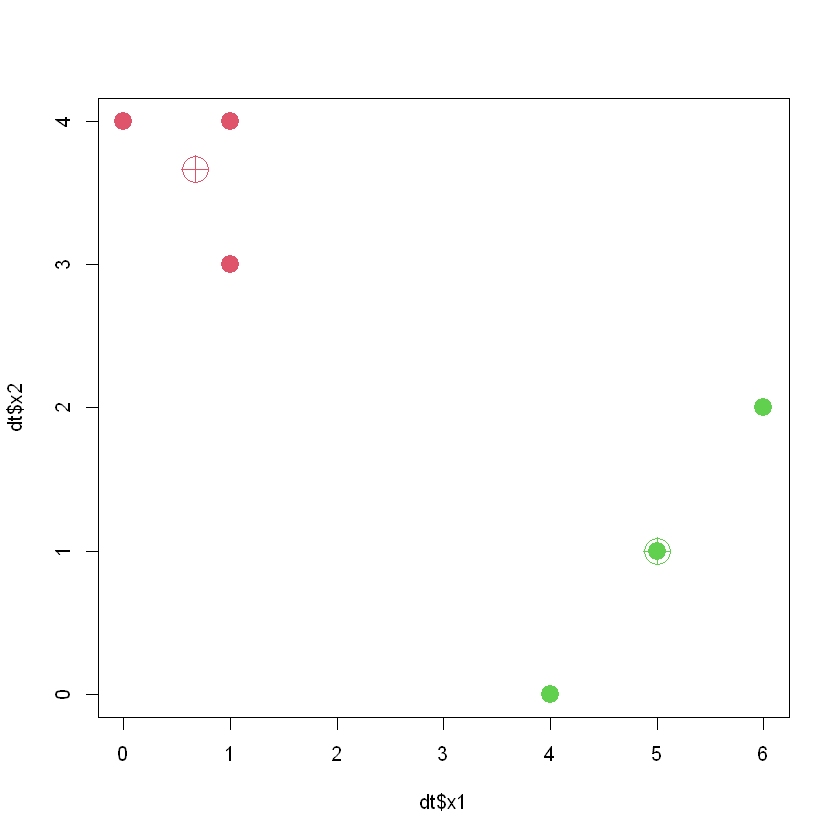

In [55]:
#f)
plot(dt$x1, dt$x2, col=(labels+1), pch=20,cex=3)
points(centroid1[1], centroid1[2], col=2, pch=10,cex=3)
points(centroid2[1], centroid2[2], col=3, pch=10,cex=3)

 ## 8 Chapter 10

In Section 10.2.3, a formula for calculating PVE was given in Equation
10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function.

On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

(b) By applying Equation 10.8 directly. That is, use the prcomp()
function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.

These two approaches should give the same results.

Hint: You will only obtain the same results in (a) and (b) if the same
data is used in both cases. For instance, if in (a) you performed
prcomp() using centered and scaled variables, then you must center
and scale the variables before applying Equation 10.3 in (b).

In [60]:
library(ISLR)

#a)

prmod <- prcomp(USArrests, center=T, scale=T)
var <- prmod$sdev^2
pve = var / sum(var)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

In [61]:
#b)
loadings <- prmod$rotation

pve2 <- rep(NA, 4)
dmean <- apply(USArrests, 2, mean)
dsdev <- sqrt(apply(USArrests, 2, var))
dsc <- sweep(USArrests, MARGIN=2, dmean, "-")
dsc <- sweep(dsc, MARGIN=2, dsdev, "/")

for (i in 1:4) {
  proto_x <- sweep(dsc, MARGIN=2, loadings[,i], "*")
  pc_x <- apply(proto_x, 1, sum)
  pve2[i] <- sum(pc_x^2)
}
pve2 <- pve2/sum(dsc^2)
pve2

[1] 0.62006039 0.24744129 0.08914080 0.04335752

## 9 Chapter 10

Consider the USArrests data. We will now perform hierarchical clustering
on the states.

(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states.

(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

(c) Hierarchically cluster the states using complete linkage and Euclidean
distance, after scaling the variables to have standard deviation
one.

(d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

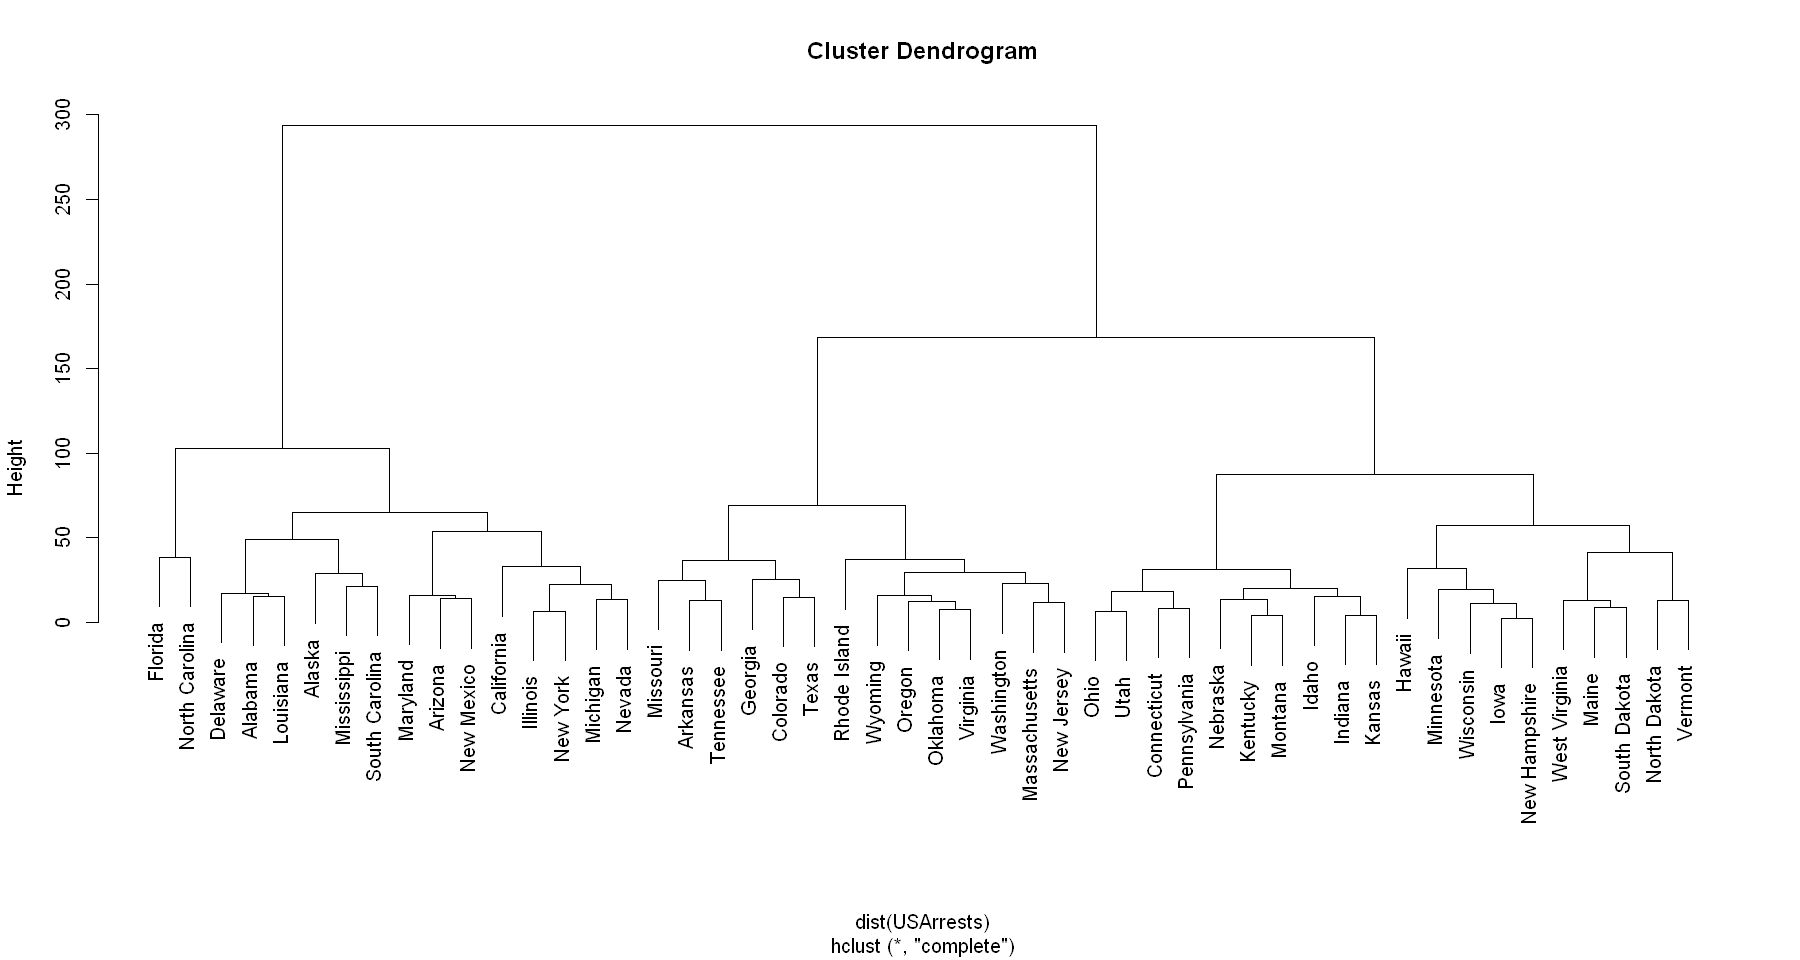

In [67]:
#a)
hclustering <- hclust(dist(USArrests), method="complete")

options(repr.plot.width=15, repr.plot.height=8)
plot(hclustering)

In [75]:
#b)
sort(cutree(hclustering, 3))

Alabama         Alaska        Arizona     California       Delaware 
             1              1              1              1              1 
       Florida       Illinois      Louisiana       Maryland       Michigan 
             1              1              1              1              1 
   Mississippi         Nevada     New Mexico       New York North Carolina 
             1              1              1              1              1 
South Carolina       Arkansas       Colorado        Georgia  Massachusetts 
             1              2              2              2              2 
      Missouri     New Jersey       Oklahoma         Oregon   Rhode Island 
             2              2              2              2              2 
     Tennessee          Texas       Virginia     Washington        Wyoming 
             2              2              2              2              2 
   Connecticut         Hawaii          Idaho        Indiana           Iowa 
             3              3              3              3              3 
        Kansas       Kentucky          Maine      Minnesota        Montana 
             3              3              3              3              3 
      Nebraska  New Hampshire   North Dakota           Ohio   Pennsylvania 
             3              3              3              3              3 
  South Dakota           Utah        Vermont  West Virginia      Wisconsin 
             3              3              3              3              3

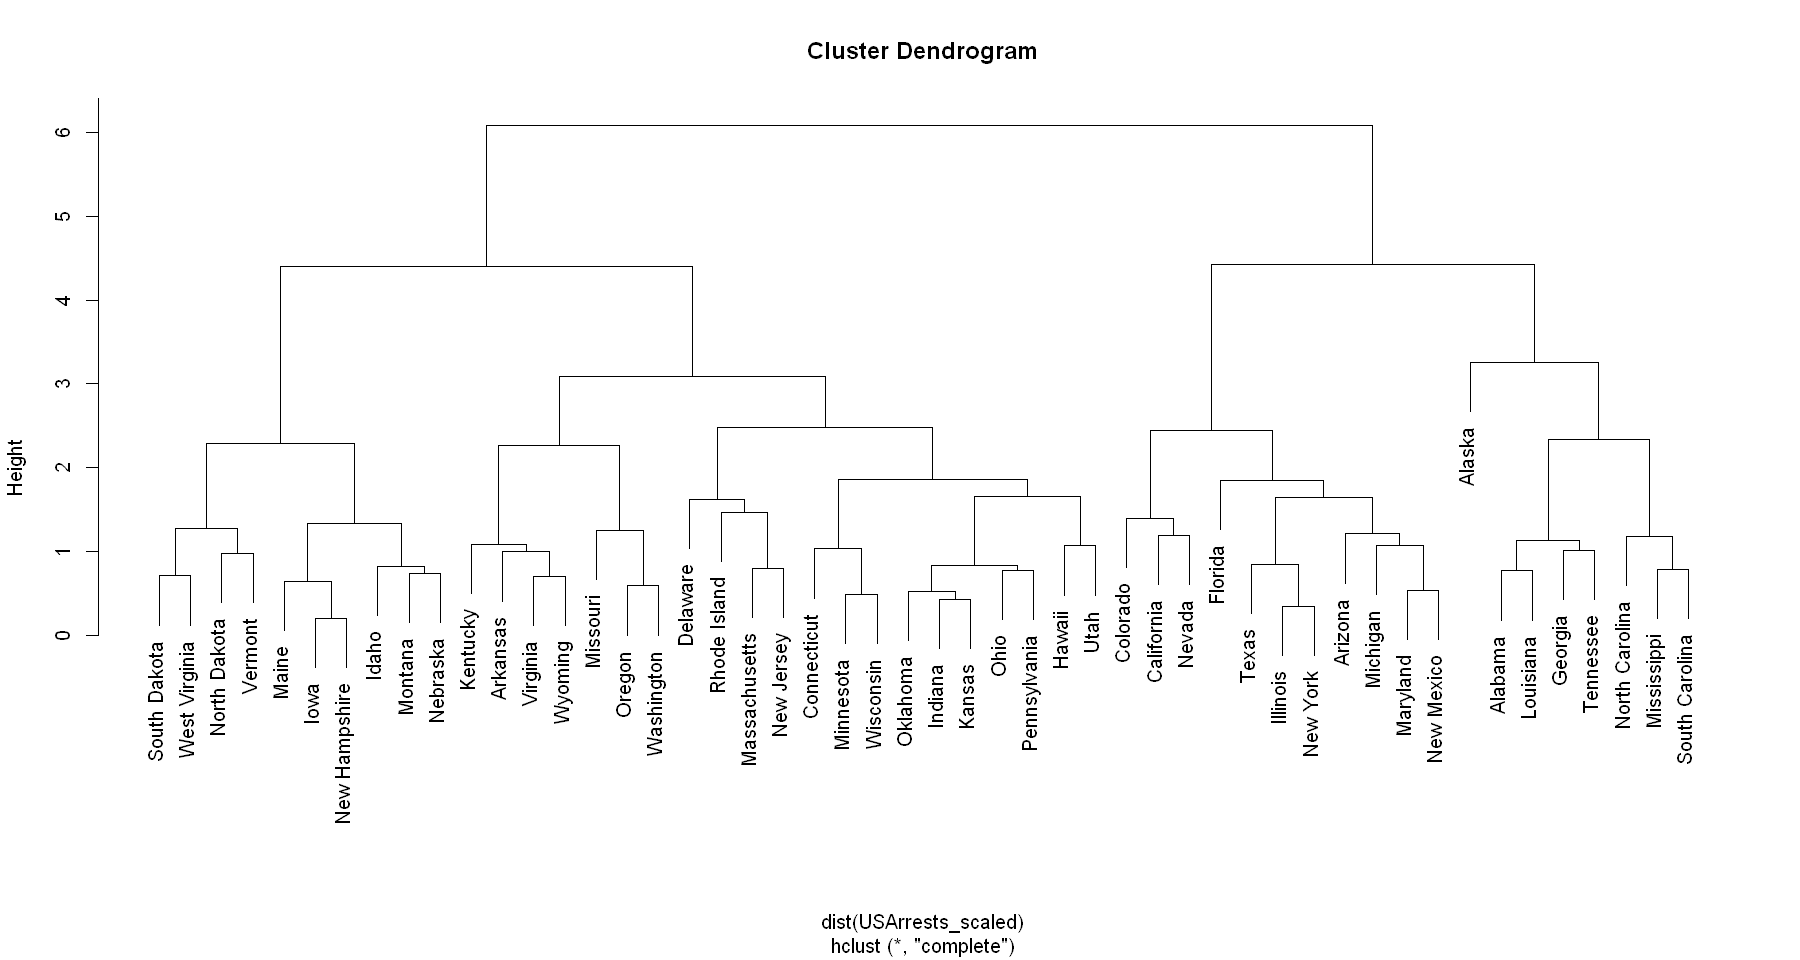

In [76]:
#c)
USArrests_scaled <- scale(USArrests)
hclustering_s = hclust(dist(USArrests_scaled), method="complete")
plot(hclustering_s)

In [78]:
#d)
sort(cutree(hclustering_s, 3))

Alabama         Alaska        Georgia      Louisiana    Mississippi 
             1              1              1              1              1 
North Carolina South Carolina      Tennessee        Arizona     California 
             1              1              1              2              2 
      Colorado        Florida       Illinois       Maryland       Michigan 
             2              2              2              2              2 
        Nevada     New Mexico       New York          Texas       Arkansas 
             2              2              2              2              3 
   Connecticut       Delaware         Hawaii          Idaho        Indiana 
             3              3              3              3              3 
          Iowa         Kansas       Kentucky          Maine  Massachusetts 
             3              3              3              3              3 
     Minnesota       Missouri        Montana       Nebraska  New Hampshire 
             3              3              3              3              3 
    New Jersey   North Dakota           Ohio       Oklahoma         Oregon 
             3              3              3              3              3 
  Pennsylvania   Rhode Island   South Dakota           Utah        Vermont 
             3              3              3              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

In [79]:
table(cutree(hclustering, 3),cutree(hclustering_s, 3))

   
     1  2  3
  1  6  9  1
  2  2  2 10
  3  0  0 20

In [81]:
head(USArrests)
head(USArrests_scaled)

,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207


The clusters change a little when scaling the information. In this case, scaling can be really important since some variables have different measure units.

## 10 Chapter 10
In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.
Hint: There are a number of functions in R that you can use to
generate data. One example is the rnorm() function; runif() is
another option. Be sure to add a mean shift to the observations
in each class so that there are three distinct classes.

(b) Perform PCA on the 60 observations and plot the first two principal
component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.

(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering
compare to the true class labels?
Hint: You can use the table() function in R to compare the true
class labels to the class labels obtained by clustering. Be careful
how you interpret the results: K-means clustering will arbitrarily
number the clusters, so you cannot simply check whether the true
class labels and clustering labels are the same.

(d) Perform K-means clustering with K = 2. Describe your results.

(e) Now perform K-means clustering with K = 4, and describe your
results.

(f) Now perform K-means clustering with K = 3 on the first two
principal component score vectors, rather than on the raw data.
That is, perform K-means clustering on the 60 × 2 matrix of
which the first column is the first principal component score
vector, and the second column is the second principal component
score vector. Comment on the results.

(g) Using the scale() function, perform K-means clustering with
K = 3 on the data after scaling each variable to have standard
deviation one. How do these results compare to those obtained
in (b)? Explain.

In [86]:
#a)
dt1 <- matrix(rnorm(20*50, mean=0, sd=2), ncol=50)
dt2 <- matrix(rnorm(20*50, mean=10, sd=2), ncol=50)
dt3 <- matrix(rnorm(20*50, mean=25, sd=2), ncol=50)

dt <- rbind(dt1,dt2,dt3)
dt

-0.7976916,1.61978739,1.97316650,-4.32402688,-0.7600187,-2.7439781,-0.3181443,-1.70734391,0.2396670,-0.14182500,⋯,0.22037705,0.02780946,-0.72704968,0.35254371,-2.103462658,0.1723150,-0.01627693,-1.1046946,2.3861140,-0.7300403
1.4184851,-0.18925475,-3.36623650,2.67698620,3.1152495,1.5615635,-3.3148491,0.55154468,-0.3562308,0.37522509,⋯,1.57014662,-3.20269401,-1.48703160,-0.47246225,-1.299250455,-1.0647302,-0.44445731,-1.8691233,1.4668932,0.9210021
-3.2452945,0.07149581,5.93634777,1.78936646,-0.2368502,-3.1130652,2.3215076,-3.72972692,1.0035696,-3.18822194,⋯,-0.37597947,2.82571008,-0.76637432,0.46772771,-0.128466703,2.5601945,-0.87609486,-1.2032289,0.4442189,1.5681831
1.5435689,1.12092507,-2.93298521,-0.40584284,2.2716938,2.7454904,0.9857275,1.52922321,0.0374292,3.32034764,⋯,0.93470797,1.92600965,1.32542265,-4.56670503,-0.009369235,0.9204550,2.82135919,0.5693569,-0.7156329,-0.8141778
-2.5759484,0.06278787,0.28102061,3.78722385,0.5384638,-0.5528288,-1.7657061,-0.98645566,-2.4498412,-4.94733732,⋯,0.18642414,0.32131686,0.56632161,-1.41633214,1.585599183,1.8968979,-3.98426933,1.3603450,1.5683511,-1.9154748
1.7831518,-0.64732163,0.08875335,-0.48236034,-1.3161129,0.7787883,0.7624464,-2.40179572,-1.8113411,0.33961613,⋯,-1.37821206,1.95831586,1.18433096,-1.47696047,0.734570234,-3.6516007,0.61971100,-0.6779212,-0.6521120,0.5640228
-0.3556669,-2.02622116,-0.36085733,0.70407139,-0.1265505,-1.8936526,1.7231557,-2.78603177,-0.6035682,-2.65670844,⋯,-1.01038230,-0.28849035,-0.70990785,0.08723898,-0.795334177,-2.7706617,5.76222275,-5.2330884,0.7309044,-1.0550524
3.4088094,2.00033324,-3.28660064,-2.95061176,1.0898994,1.6623765,-3.2868423,3.18096976,-1.3451889,2.72776856,⋯,-1.71974301,1.42894435,-0.91154259,1.41871134,2.663746699,-3.7872311,1.27965518,-3.2929896,-1.2929169,-1.1015715
-2.5730122,3.94810652,-1.97416831,0.42534507,-1.1451826,2.8489468,-0.3636915,-0.73768296,-2.3880888,0.67977154,⋯,0.18240910,1.73216041,-1.86804485,-2.85289871,1.501165760,1.0845828,2.91851345,-0.7584072,-1.3157905,0.6253675
-0.9911231,1.91744181,2.21960244,-1.54918847,-1.1947988,-0.4640139,-0.2292172,-0.04843946,0.6567480,0.39147806,⋯,-0.13307686,1.96925880,0.88716988,-0.94613137,-0.563335485,3.1027896,-0.33470444,0.3338050,0.8537896,-0.2342941
0.4305509,2.08519344,0.31845097,-1.25790588,1.1842491,2.7616754,0.8187829,-2.45587491,0.2233181,0.96947012,⋯,-1.45657208,-0.42042453,2.23594069,-1.50199807,-1.372192951,-4.1367445,0.43232836,2.3126223,0.7671758,2.0242604


In [87]:
#b)
pcamod = prcomp(dt)
summary(pcamod)

Importance of components:
                           PC1     PC2     PC3     PC4     PC5    PC6     PC7
Standard deviation     73.5142 3.88210 3.71456 3.46731 3.30711 3.1712 3.04179
Proportion of Variance  0.9647 0.00269 0.00246 0.00215 0.00195 0.0018 0.00165
Cumulative Proportion   0.9647 0.96737 0.96983 0.97198 0.97393 0.9757 0.97738
                           PC8    PC9   PC10    PC11    PC12    PC13    PC14
Standard deviation     2.94292 2.8993 2.7991 2.77401 2.67749 2.55187 2.49996
Proportion of Variance 0.00155 0.0015 0.0014 0.00137 0.00128 0.00116 0.00112
Cumulative Proportion  0.97892 0.9804 0.9818 0.98320 0.98448 0.98564 0.98675
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     2.44300 2.35529 2.28919 2.20522 2.20042 2.07657 2.01737
Proportion of Variance 0.00107 0.00099 0.00094 0.00087 0.00086 0.00077 0.00073
Cumulative Proportion  0.98782 0.98881 0.98974 0.99061 0.99148 0.99225 0.99297
                          PC22    PC23

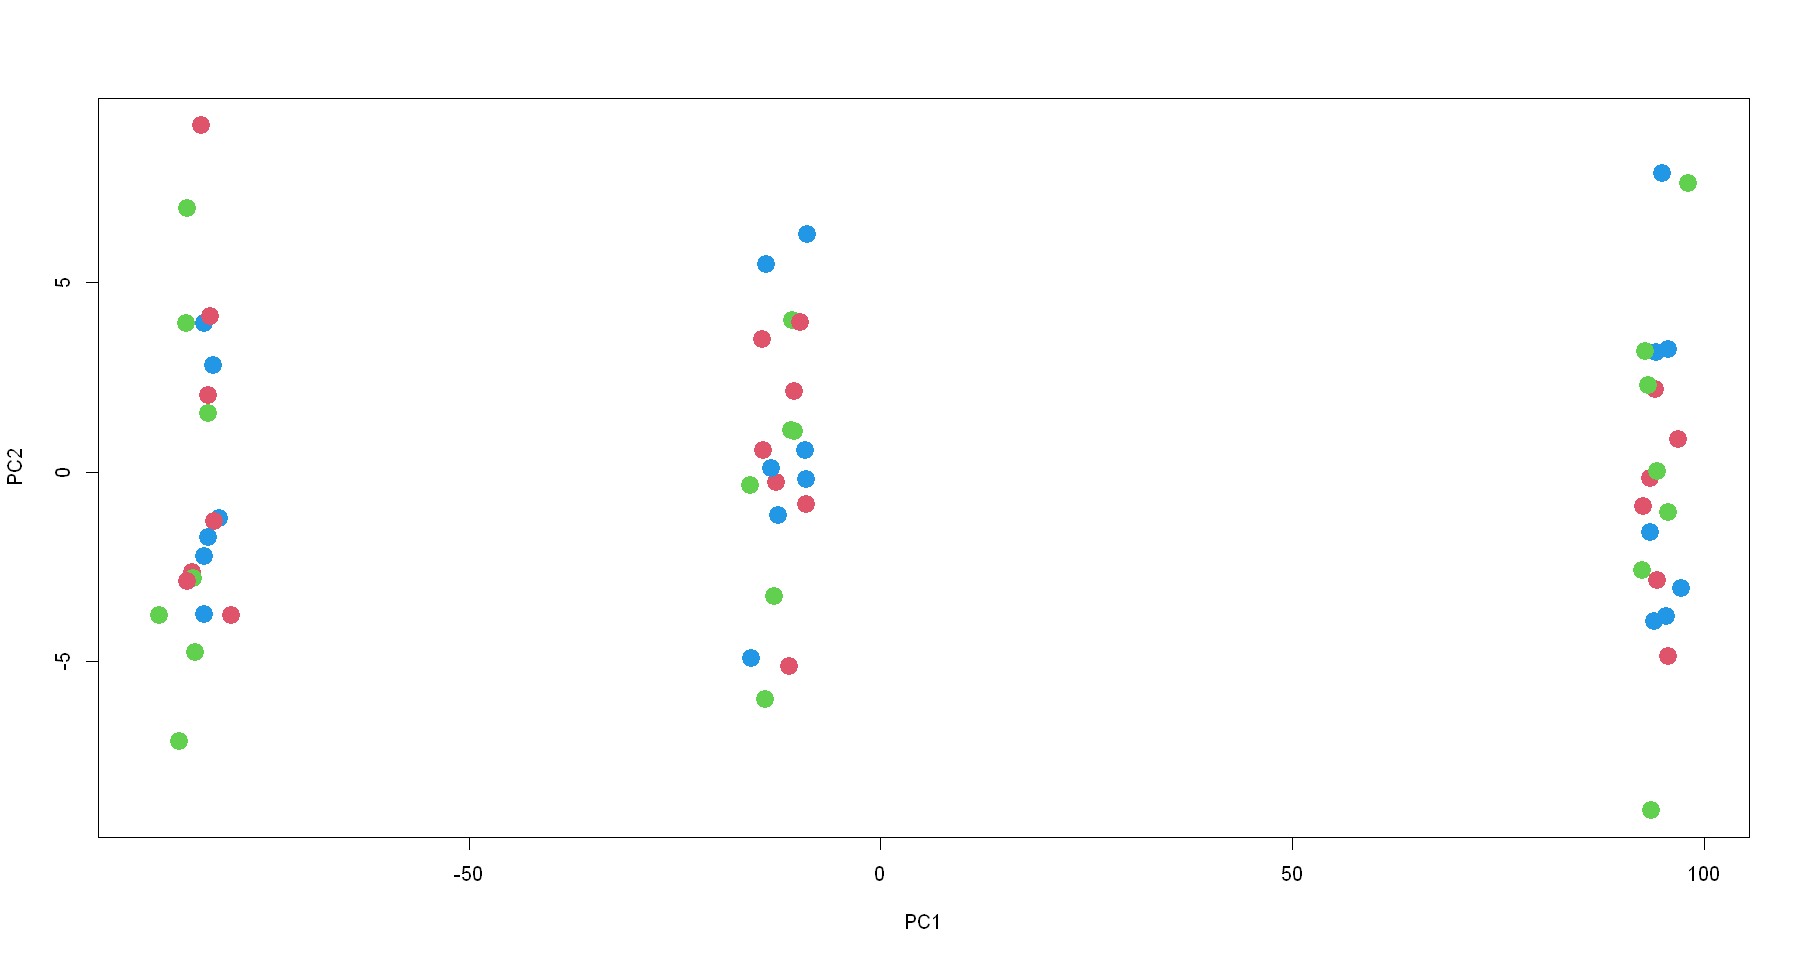

In [89]:
plot(pcamod$x[,1:2], col=2:4,pch=20,cex=3) 

In [90]:
#c)
kmmod <- kmeans(dt, 3, nstart=20)
table(kmmod$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [91]:
#d)
kmmod <- kmeans(dt, 2, nstart=20)
kmmod$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [92]:
#e)
kmmod <- kmeans(dt, 4, nstart=20)
kmmod$cluster

[1] 4 1 4 1 4 4 4 1 1 4 1 1 4 1 4 4 4 4 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
[39] 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [93]:
kmmod <- kmeans(pcamod$x[,1:2], 3, nstart=20)
table(kmmod$cluster, c(rep(1,20), rep(2,20), rep(3,20)))

   
     1  2  3
  1  0 20  0
  2  0  0 20
  3 20  0  0

In [94]:
kmmod <- kmeans(scale(dt), 3, nstart=20)
kmmod$cluster

[1] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2